## Processing XML Files

### Introduction

The Extensible Markdown Language, often referred to as just XML, allows us to separate data from its format. All the data that is found in an XML file is encapsulated in a hierarchical manner using XML tags. The XML tags used in the file can be self-defined, and as a result, we are able to create descriptive tags that suit our application. If you've done a bit of web development, you'll notice that the structure of the file reads like an HTML file. Do not be confused by the two, HTML defines how data is displayed on a web page, whereas XML allows us to store data regardless of how it will be presented.

### Import Libraries
First, we import the two libraries that will aid in extracting the XML data. For this project, we will make use of the Pandas and ElementTree libraries.

In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import urllib

### Import and Investigate XML
We will now load a sample XML file containing a catalog of books. Each book in the catalog will contain the following attributes:

| Attributes   | Description                                      |
|--------------|--------------------------------------------------|
| id           | Unique ID for each book in the catalog           |
| author       | Name of the person who wrote the book            |
| title        | Title found on the book's cover                  |
| genre        | Literature category that the book belongs to     |
| price        | The price at which the book is being sold        |
| publish_date | Publication date of the book                     |
| description  | A short description of the book                  |



In [2]:
# Load the dataset from the github repo
xml_file = urllib.request.urlretrieve("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/books.xml","books.xml")
# Next input the path to where you have the books.xml file saved locally - the above step will have downloaded the data into your current working directory.
file_path = "books.xml"

To work with the XML file, we first need to parse it so that a tree data structure is used to store the contents of the file in a hierarchical manner. To do this we'll make use of the ET.parse() function call.

In [3]:
xtree = ET.parse(file_path)

After parsing the XML file, a tree object (also referred to as an Element Tree) is created in memory. It is called an Element Tree because each node in the tree is referred to as an element.

In [4]:
# Print the tree object to view it's location in memory
print('Object:\t\t', xtree)

# Print the data type of the newly created object.
print('Data type:\t', type(xtree))

Object:		 <xml.etree.ElementTree.ElementTree object at 0x0000028F6B8A0D00>
Data type:	 <class 'xml.etree.ElementTree.ElementTree'>


Once we have instantiated the xtree object, we can start working with the object by starting at the root of the tree data structure so we can move through the different levels of information. Looking at the XML file, we can notice that the highest level in the hierarchy is catalog - this is where the root will point to. Let's have a look at the example below

In [5]:
# Obtain the root of the element tree
xroot = xtree.getroot()

# Print the element object to view it's location in memory
print('Object:\t\t', xroot)

# Print the data type associated to xroot
print('Data type:\t', type(xroot))

# Print the xml tag associated with the root element
print ('XML Tag:\t', xroot.tag)

Object:		 <Element 'catalog' at 0x0000028F6E092D60>
Data type:	 <class 'xml.etree.ElementTree.Element'>
XML Tag:	 catalog


We will now iterate through the xroot object to view all the child elements that exist. As it stands, the Element Tree will contain three levels.




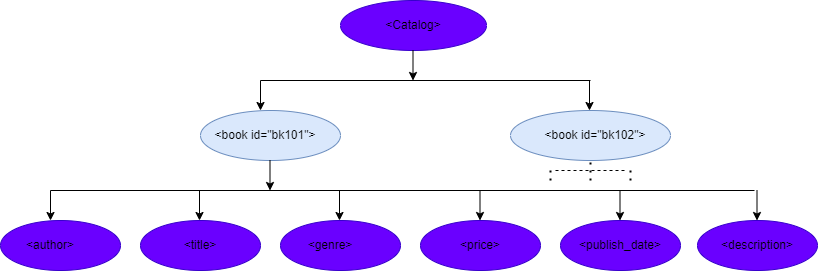




- __Level 1__: The root element, which is a "catalog" for the sample XML file.
- __Level 2__: The books that can be found in the catalog
- __Level 3__: The attributes associated with each book

In [6]:
# Print child tags and atributes associated with the root XML tag: "catalog"
for child in xroot:
    print(child.tag, child.attrib)
    for grandchild in child:
        print('\t', grandchild.tag, grandchild.text)

book {'id': 'bk101'}
	 author Gambardella, Matthew
	 title XML Developer's Guide
	 genre Computer
	 price 44.95
	 publish_date 2000-10-01
	 description An in-depth look at creating applications 
      with XML.
book {'id': 'bk102'}
	 author Ralls, Kim
	 title Midnight Rain
	 genre Fantasy
	 price 5.95
	 publish_date 2000-12-16
	 description A former architect battles corporate zombies, 
      an evil sorceress, and her own childhood to become queen 
      of the world.
book {'id': 'bk103'}
	 author Corets, Eva
	 title Maeve Ascendant
	 genre Fantasy
	 price 5.95
	 publish_date 2000-11-17
	 description After the collapse of a nanotechnology 
      society in England, the young survivors lay the 
      foundation for a new society.
book {'id': 'bk104'}
	 author Corets, Eva
	 title Oberon's Legacy
	 genre Fantasy
	 price 5.95
	 publish_date 2001-03-10
	 description In post-apocalypse England, the mysterious 
      agent known only as Oberon helps to create a new life 
      for the inhabi

### Extract XML content
Previousily, we've loaded and parsed the XML file to create the ElementTree object. Now that we've seen how the data is stored, we can extract it from the data structure and present it in a tabular format. To achieve this, in the below cell we will specify the columns of our table to match the attributes that are found in the tree structure.

In [8]:
df_cols = ["id",
           "author",
           "title",
           "genre",
           "price",
           "publish_date",
           "description"]

Next, we need to define the structure of the raw pandas dataframe. We will use a list of dictionaries to build the dataframe, where each dictionary in the list will represent a single record or row of data. Once we have it arranged in this format, we will make use of the pd.DataFrame() function call to convert the list of dictionaries into a dataframe.

In [9]:
# Initialising an empty list of rows to store the data
rows = []
# Now we loop through each "node/element" in the xroot object.
for node in xroot:
    # for each "node" we look for a specific tag using the .get() method
    b_id = node.attrib.get(df_cols[0])
    # We have also added a check to add "None" in cases where data is missing
    b_author = node.find(df_cols[1]).text if node is not None else None
    b_title = node.find(df_cols[2]).text if node is not None else None
    b_genre = node.find(df_cols[3]).text if node is not None else None
    b_price = node.find(df_cols[4]).text if node is not None else None
    b_publish_date = node.find(df_cols[5]).text if node is not None else None
    b_description = node.find(df_cols[6]).text if node is not None else None

    # Lastly we append each of the nodes in a dictionary format to start creating our dataframe.
    rows.append({
            df_cols[0]: b_id,
            df_cols[1]: b_author,
            df_cols[2]: b_title,
            df_cols[3]: b_genre,
            df_cols[4]: b_price,
            df_cols[5]: b_publish_date,
            df_cols[6]: b_description
        })

Let's print out the row to check that the data is in the correct format

In [10]:
# Print out rows to check that the data is in the correct format.
i = 0
for row in rows:
    i += 1
    print('Row '+ str(i)+' -->',row, '\n')

Row 1 --> {'id': 'bk101', 'author': 'Gambardella, Matthew', 'title': "XML Developer's Guide", 'genre': 'Computer', 'price': '44.95', 'publish_date': '2000-10-01', 'description': 'An in-depth look at creating applications \n      with XML.'} 

Row 2 --> {'id': 'bk102', 'author': 'Ralls, Kim', 'title': 'Midnight Rain', 'genre': 'Fantasy', 'price': '5.95', 'publish_date': '2000-12-16', 'description': 'A former architect battles corporate zombies, \n      an evil sorceress, and her own childhood to become queen \n      of the world.'} 

Row 3 --> {'id': 'bk103', 'author': 'Corets, Eva', 'title': 'Maeve Ascendant', 'genre': 'Fantasy', 'price': '5.95', 'publish_date': '2000-11-17', 'description': 'After the collapse of a nanotechnology \n      society in England, the young survivors lay the \n      foundation for a new society.'} 

Row 4 --> {'id': 'bk104', 'author': 'Corets, Eva', 'title': "Oberon's Legacy", 'genre': 'Fantasy', 'price': '5.95', 'publish_date': '2001-03-10', 'description': '

### Putting it all together
Create a fuction that is able to take our XML file and column names as input, and return a pandas DataFrame object containing the XML element tree data in a tabular form.

In [11]:
def parse_xml_v1(xml_file: str, df_cols: list):
    """Extract data from an XML file and store it in a tabular form 

    Args:
        xml_file (str): Path to XML file
        df_cols (list): Field names to capture from the XML

    Returns:
        pandas.DataFrame: The XML data data stored in a tabular format.
    """
    xtree = ET.parse(xml_file)
    xroot = xtree.getroot()
    rows = []

    for node in xroot:
        b_id = node.attrib.get(df_cols[0])
        b_author = node.find(df_cols[1]).text if node is not None else None
        b_title = node.find(df_cols[2]).text if node is not None else None
        b_genre = node.find(df_cols[3]).text if node is not None else None
        b_price = node.find(df_cols[4]).text if node is not None else None
        b_publish_date = node.find(df_cols[5]).text if node is not None else None
        b_description = node.find(df_cols[6]).text if node is not None else None

        rows.append({
            df_cols[0]: b_id,
            df_cols[1]: b_author,
            df_cols[2]: b_title,
            df_cols[3]: b_genre,
            df_cols[4]: b_price,
            df_cols[5]: b_publish_date,
            df_cols[6]: b_description
        })

        # Here we specify the source and the schema of our dataframe.
        out_df = pd.DataFrame(rows, columns = df_cols)
    return out_df

We'll now call the function that you've created in the previous cell to transform the XML file into a pandas dataframe.

In [12]:
df = parse_xml_v1(file_path, df_cols)
df

,id,author,title,genre,price,publish_date,description
0,bk101,"Gambardella, Matthew",XML Developer's Guide,Computer,44.95,2000-10-01,An in-depth look at creating applications \n ...
1,bk102,"Ralls, Kim",Midnight Rain,Fantasy,5.95,2000-12-16,"A former architect battles corporate zombies, ..."
2,bk103,"Corets, Eva",Maeve Ascendant,Fantasy,5.95,2000-11-17,After the collapse of a nanotechnology \n ...
3,bk104,"Corets, Eva",Oberon's Legacy,Fantasy,5.95,2001-03-10,"In post-apocalypse England, the mysterious \n ..."
4,bk105,"Corets, Eva",The Sundered Grail,Fantasy,5.95,2001-09-10,"The two daughters of Maeve, half-sisters, \n ..."
5,bk106,"Randall, Cynthia",Lover Birds,Romance,4.95,2000-09-02,When Carla meets Paul at an ornithology \n ...
6,bk107,"Thurman, Paula",Splish Splash,Romance,4.95,2000-11-02,A deep sea diver finds true love twenty \n ...
7,bk108,"Knorr, Stefan",Creepy Crawlies,Horror,4.95,2000-12-06,"An anthology of horror stories about roaches,\..."
8,bk109,"Kress, Peter",Paradox Lost,Science Fiction,6.95,2000-11-02,After an inadvertant trip through a Heisenberg...
9,bk110,"O'Brien, Tim",Microsoft .NET: The Programming Bible,Computer,36.95,2000-12-09,Microsoft's .NET initiative is explored in \n ...
